In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

PyTorch version:[1.7.0+cu101].
device:[cuda:0].


In [3]:
import os
import shutil
import glob


TARGET_PATH = "./drive/MyDrive/Colab Notebooks/boostcamp/test/redvelvet_dataset"

In [4]:
for dir_name in os.listdir(TARGET_PATH):
    breed_name = dir_name.split("-")[-1].lower()
    source_dir = os.path.join(TARGET_PATH, dir_name)
    target_dir = os.path.join(TARGET_PATH, breed_name)
    shutil.move(source_dir, target_dir)

In [5]:
dataset = []
for filepath in glob.iglob(f'{TARGET_PATH}/**/*.png', recursive=True):
    breed_name = filepath.split("/")[7]
    dataset.append([filepath, breed_name])
dataset = np.array(dataset)

In [6]:
redvelvet_data = []
redvelvet_target = []

for i,j in dataset:
  redvelvet_data.append(i)
  redvelvet_target.append(j)

In [7]:
redvelvet_target=set(redvelvet_target)

In [19]:
from sklearn.model_selection import KFold

kfold= KFold(n_splits=5,shuffle=True)

In [41]:
from torchvision import datasets, transforms, models

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.RandomRotation(30),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor()])

# Pass transforms in here, then run the next cell to see how the transforms look
redvelvet_data = datasets.ImageFolder(TARGET_PATH, transform=train_transforms)

In [61]:
BATCH_SIZE = 16
for train_index,test_index in kfold.split(redvelvet_data):
    train_data = torch.utils.data.Subset(redvelvet_data,train_index)
    test_data = torch.utils.data.Subset(redvelvet_data,test_index)

In [62]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

In [63]:
classes = ('irene','joy','seulgi','wendy','yeri')

In [64]:
np.set_printoptions(precision=3)
n_param = 0
for p_idx,(param_name,param) in enumerate(C.named_parameters()):
    if param.requires_grad:
        param_numpy = param.detach().cpu().numpy() # to numpy array 
        n_param += len(param_numpy.reshape(-1))
        print ("[%d] name:[%s] shape:[%s]."%(p_idx,param_name,param_numpy.shape))
        print ("    val:%s"%(param_numpy.reshape(-1)[:5]))
print ("Total number of parameters:[%s]."%(format(n_param,',d')))

[0] name:[features.conv0.weight] shape:[(96, 3, 7, 7)].
    val:[-0.082 -0.175 -0.217 -0.234 -0.21 ]
[1] name:[features.norm0.weight] shape:[(96,)].
    val:[-3.553e-01  1.588e-02 -3.954e-16 -1.396e-01 -1.642e-02]
[2] name:[features.norm0.bias] shape:[(96,)].
    val:[ 6.871e-02  3.255e-02 -7.185e-15  5.933e-02  5.566e-02]
[3] name:[features.denseblock1.denselayer1.norm1.weight] shape:[(96,)].
    val:[-1.819e-01  2.041e-01  2.800e-16 -2.212e-01  1.034e-01]
[4] name:[features.denseblock1.denselayer1.norm1.bias] shape:[(96,)].
    val:[ 3.310e-01  2.742e-01 -1.900e-15  4.202e-01  1.187e-01]
[5] name:[features.denseblock1.denselayer1.conv1.weight] shape:[(192, 96, 1, 1)].
    val:[ 1.266e-02  1.291e-01 -8.052e-16 -8.470e-03  4.344e-03]
[6] name:[features.denseblock1.denselayer1.norm2.weight] shape:[(192,)].
    val:[8.789e-02 3.605e-11 7.801e-02 2.392e-01 1.630e-01]
[7] name:[features.denseblock1.denselayer1.norm2.bias] shape:[(192,)].
    val:[ 1.827e-02 -5.297e-10  1.359e-01 -1.554e-01

In [65]:
np.set_printoptions(precision=3)
torch.set_printoptions(precision=3)
x_numpy = np.random.rand(2,3,224,224)
x_torch = torch.from_numpy(x_numpy).float().to(device)
y_torch = C.forward(x_torch) # forward path
y_numpy = y_torch.detach().cpu().numpy() # torch tensor to numpy array
print ("x_torch:\n",x_torch)
print ("y_torch:\n",y_torch)
print ("\nx_numpy %s:\n"%(x_numpy.shape,),x_numpy)
print ("y_numpy %s:\n"%(y_numpy.shape,),y_numpy)

x_torch:
 tensor([[[[0.498, 0.344, 0.443,  ..., 0.095, 0.460, 0.220],
          [0.604, 0.077, 0.953,  ..., 0.150, 0.521, 0.435],
          [0.223, 0.114, 0.350,  ..., 0.684, 0.606, 0.458],
          ...,
          [0.223, 0.281, 0.950,  ..., 0.623, 0.924, 0.861],
          [0.470, 0.210, 0.381,  ..., 0.013, 0.234, 0.157],
          [0.473, 0.050, 0.175,  ..., 0.284, 0.923, 0.772]],

         [[0.612, 0.329, 0.562,  ..., 0.911, 0.796, 0.428],
          [0.519, 0.296, 0.252,  ..., 0.285, 0.100, 0.140],
          [0.895, 0.772, 0.875,  ..., 0.591, 0.178, 0.121],
          ...,
          [0.101, 0.781, 0.784,  ..., 0.893, 0.720, 0.771],
          [0.148, 0.289, 0.657,  ..., 0.261, 0.051, 0.530],
          [0.519, 0.509, 0.170,  ..., 0.487, 0.606, 0.884]],

         [[0.679, 0.235, 0.500,  ..., 0.303, 0.726, 0.510],
          [0.105, 0.298, 0.243,  ..., 0.668, 0.457, 0.845],
          [0.542, 0.444, 0.382,  ..., 0.365, 0.322, 0.629],
          ...,
          [0.550, 0.475, 0.471,  ..., 0.9

In [66]:
def func_eval(model,data_iter,device):
    with torch.no_grad():
        n_total,n_correct = 0,0
        model.eval() # evaluate (affects DropOut and BN)
        for batch_in,batch_out in data_iter:
            y_trgt = batch_out.to(device)
            model_pred = model(batch_in.view(-1,3,224,224).to(device))
            _,y_pred = torch.max(model_pred.data,1)
            n_correct += (y_pred==y_trgt).sum().item()
            n_total += batch_in.size(0)
        val_accr = (n_correct/n_total)
        model.train() # back to train mode 
    return val_accr
print ("Done")

Done


In [88]:
#C.init_param() # initialize parameters
C = models.resnet50(pretrained=True)
C.cuda()
loss = nn.CrossEntropyLoss()
optm = optim.SGD(C.parameters(),momentum=0.9,lr=1e-3)

train_accr = func_eval(C,train_loader,device)
test_accr = func_eval(C,test_loader,device)
print ("train_accr:[%.3f] test_accr:[%.3f]."%(train_accr,test_accr))

train_accr:[0.000] test_accr:[0.000].


In [80]:
from torch.autograd import Variable

def mixup_data(x, y, alpha=1.0):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]

  #  for idx in range(16):
  #      np_mixed_x = mixed_x[idx,:,:,:].cpu().numpy()
  #      plt.imshow(np.transpose(np_mixed_x , (1,2,0)))
  #      plt.show()

    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


In [89]:
print ("Start training.")
#C.init_param() # initialize parameters
C.train() # to train mode 
EPOCHS,print_every = 50,1
for epoch in range(EPOCHS):
    loss_val_sum = 0
    for batch_in,batch_out in train_loader:
        # Forward path
        X = batch_in.view(-1, 3, 224, 224).to(device)
        Y = batch_out.to(device)
        inputs, targets_a, targets_b, lam = mixup_data(X, Y,0.5)
        inputs, targets_a, targets_b = map(Variable, (inputs, targets_a, targets_b))

        y_pred = C.forward(inputs)
        loss_out = loss(y_pred,Y)
        # Update
        optm.zero_grad()      # reset gradient 
        loss_out.backward()     # backpropagate
        optm.step()      # optimizer update
        loss_val_sum += loss_out
    loss_val_avg = loss_val_sum/len(train_loader)
    # Print
    if ((epoch%print_every)==0) or (epoch==(EPOCHS-1)):
        train_accr = func_eval(C,train_loader,device)
        test_accr = func_eval(C,test_loader,device)
        print ("epoch:[%d] loss:[%.3f] train_accr:[%.3f] test_accr:[%.3f]."%
               (epoch,loss_val_avg,train_accr,test_accr))
print ("Done")

Start training.
epoch:[0] loss:[4.762] train_accr:[0.287] test_accr:[0.190].
epoch:[1] loss:[1.839] train_accr:[0.318] test_accr:[0.229].
epoch:[2] loss:[1.684] train_accr:[0.344] test_accr:[0.200].
epoch:[3] loss:[1.670] train_accr:[0.432] test_accr:[0.352].
epoch:[4] loss:[1.695] train_accr:[0.442] test_accr:[0.295].
epoch:[5] loss:[1.664] train_accr:[0.449] test_accr:[0.238].
epoch:[6] loss:[1.571] train_accr:[0.504] test_accr:[0.324].
epoch:[7] loss:[1.620] train_accr:[0.553] test_accr:[0.333].
epoch:[8] loss:[1.468] train_accr:[0.632] test_accr:[0.305].
epoch:[9] loss:[1.582] train_accr:[0.625] test_accr:[0.276].
epoch:[10] loss:[1.464] train_accr:[0.556] test_accr:[0.381].
epoch:[11] loss:[1.486] train_accr:[0.679] test_accr:[0.333].
epoch:[12] loss:[1.446] train_accr:[0.672] test_accr:[0.400].
epoch:[13] loss:[1.501] train_accr:[0.679] test_accr:[0.381].
epoch:[14] loss:[1.471] train_accr:[0.675] test_accr:[0.362].
epoch:[15] loss:[1.464] train_accr:[0.665] test_accr:[0.324].
ep

In [90]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

In [91]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

In [92]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_title(title)
    return ax

In [94]:
n_sample = 16
sample_indices = np.random.choice(len(test_data), n_sample, replace=False)
test_x = images[:n_sample]
test_y = labels[:n_sample]

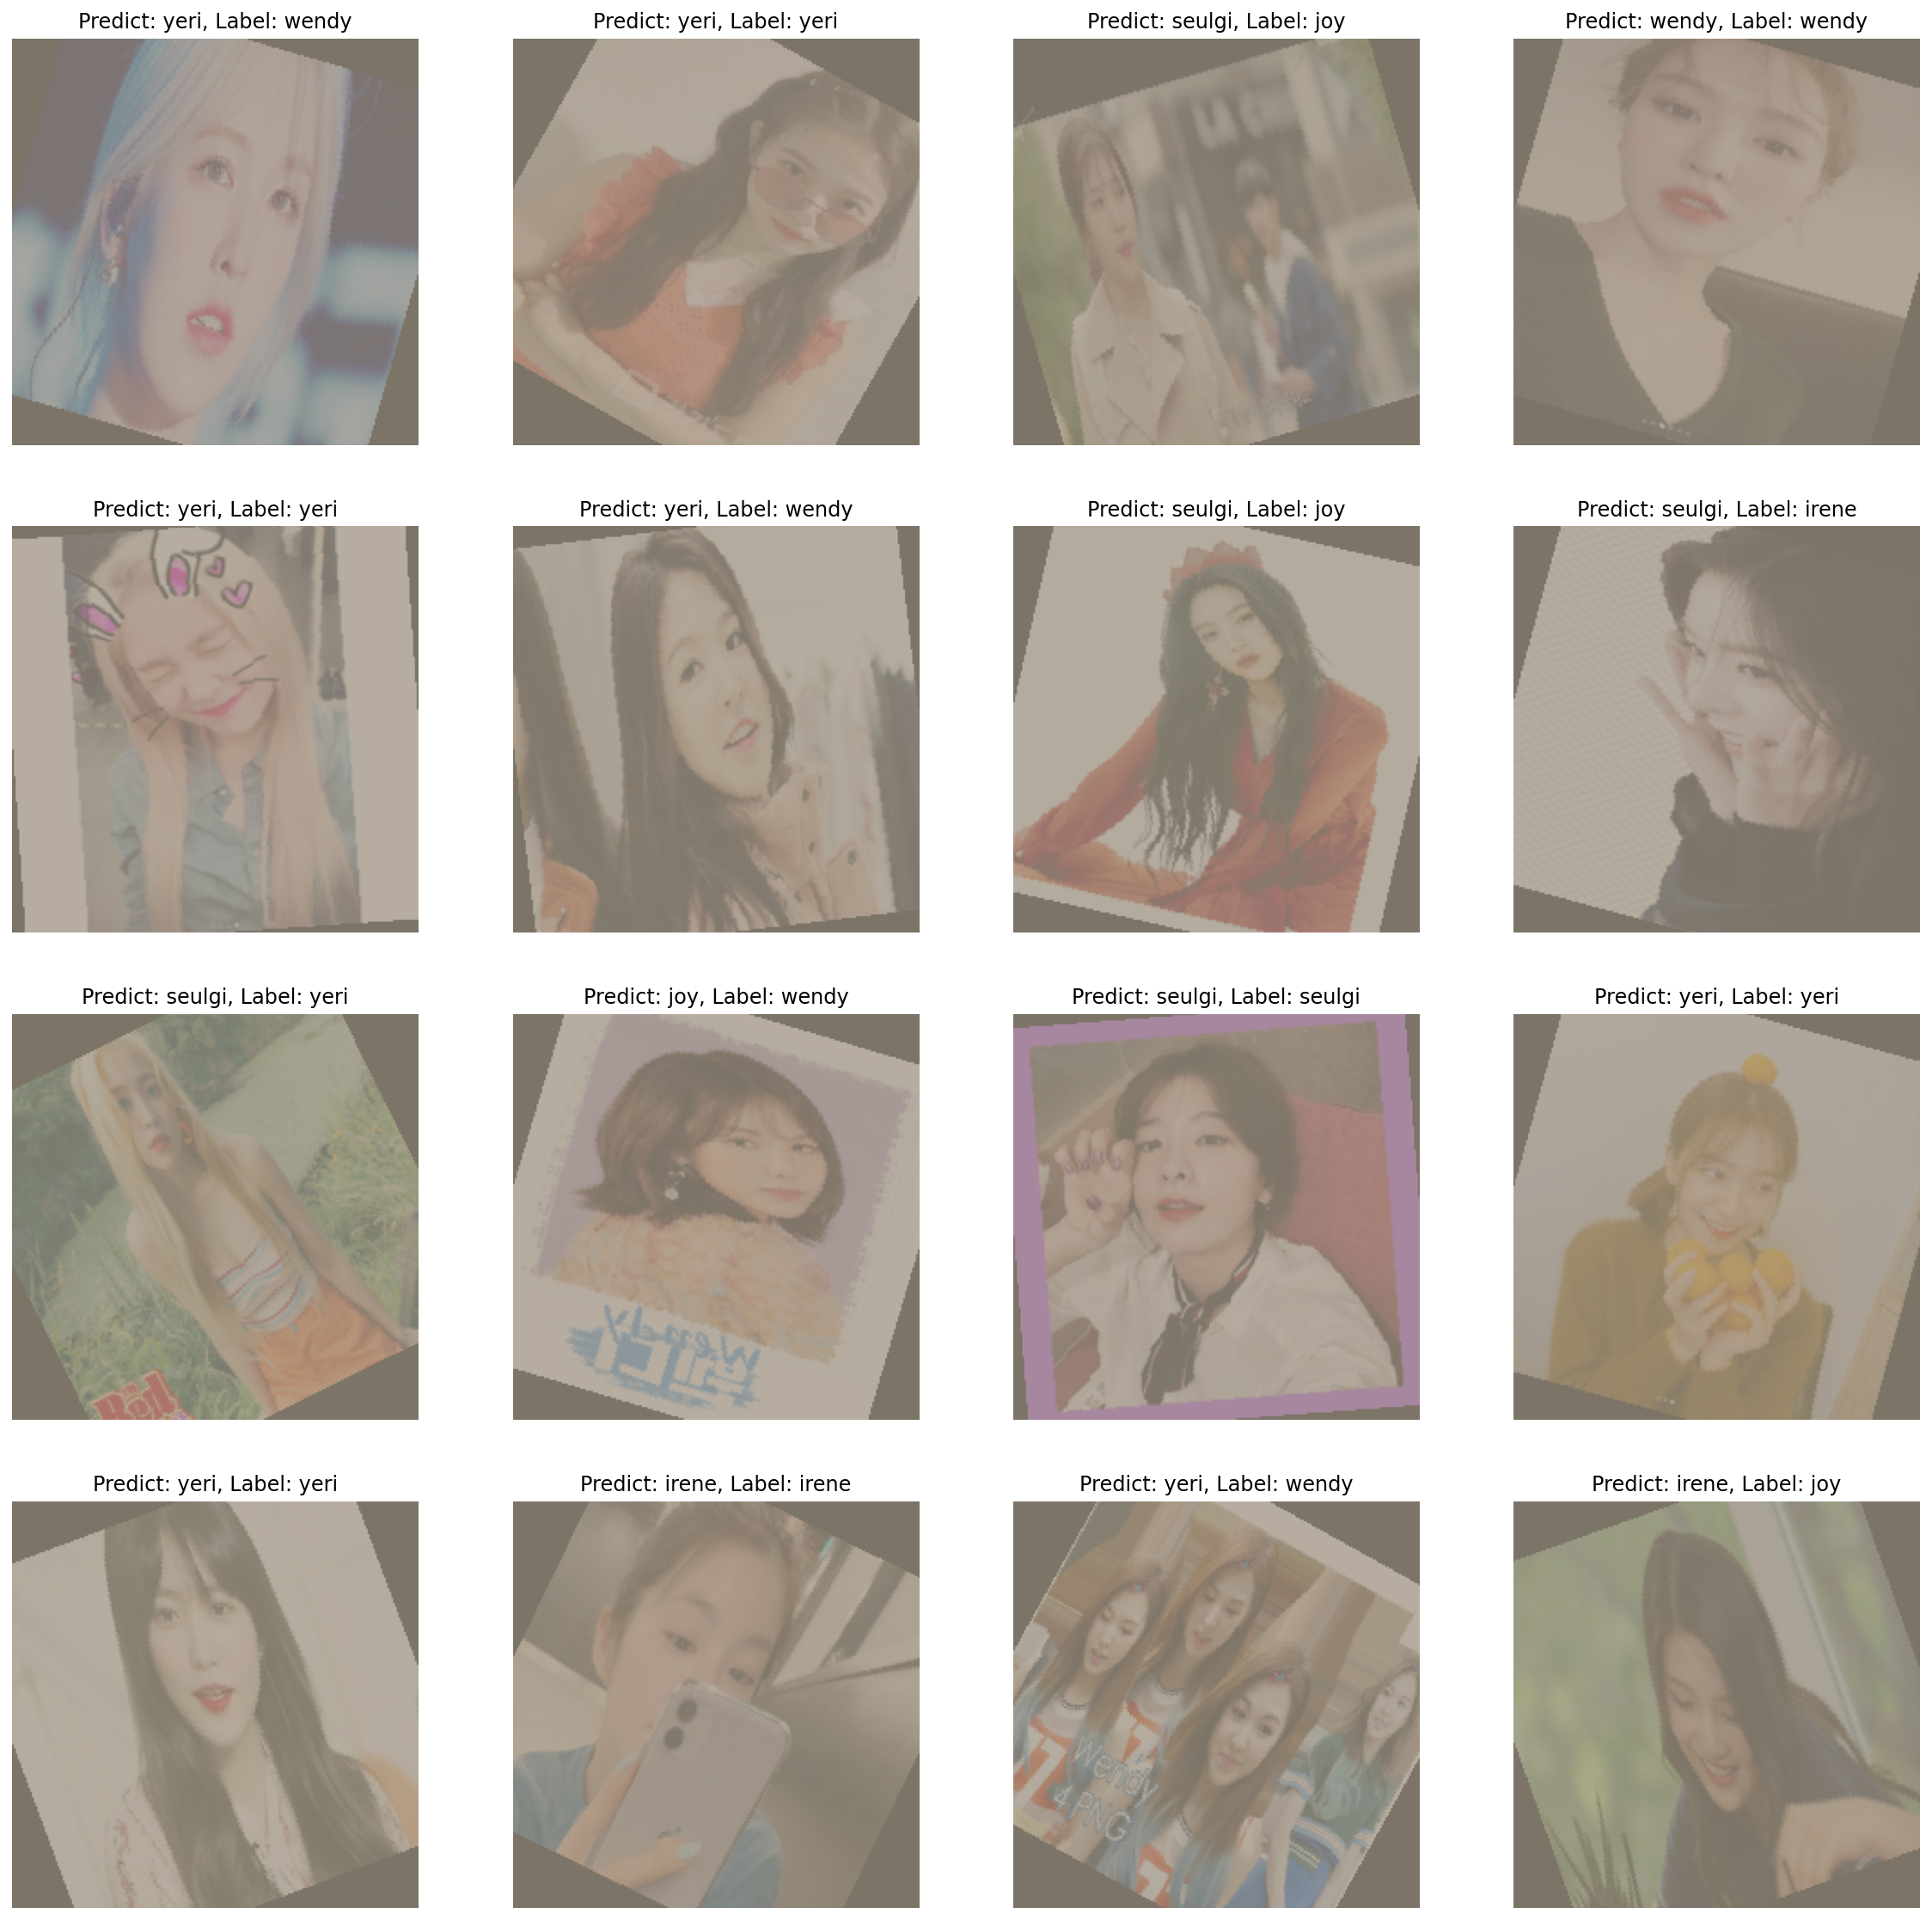

In [95]:
with torch.no_grad():
    C.eval()
    y_pred = C.forward(test_x.view(-1, 3, 224, 224).type(torch.float).to(device))
    
y_pred = y_pred.argmax(axis=1)

plt.figure(figsize=(20, 20))

for idx in range(n_sample):
    ax = plt.subplot(4, 4, idx+1)
    title = f"Predict: {classes[y_pred[idx]]}, Label: {classes[test_y[idx]]}"
    imshow(test_x[idx], ax, title)

plt.show()

In [ ]:
y_pred

tensor([2, 2, 4, 0, 2, 0, 1, 0, 3, 0, 0, 4, 3, 0, 4, 4], device='cuda:0')